In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('fifa_56rows.csv')

/Users/cnieto/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,Unnamed: 0,sofifa_id,short_name,overall,potential,value_eur,wage_eur,age,dob,height_cm,...,mentality_vision,mentality_penalties,mentality_composure,defending_sliding_tackle,goalkeeping_handling,cam,cdm,gk,work_rate_attacking,work_rate_deffensive
0,0,158023,L. Messi,93,93,78000000.0,320000.0,34,1987-06-24,170,...,95,75,96,24,11,93,64,19,2,1
1,1,188545,R. Lewandowski,92,92,119500000.0,270000.0,32,1988-08-21,185,...,81,90,88,19,6,86,66,19,3,2
2,2,20801,Cristiano Ronaldo,91,91,45000000.0,270000.0,36,1985-02-05,187,...,76,88,95,24,11,86,59,20,3,1
3,3,190871,Neymar Jr,91,91,129000000.0,270000.0,29,1992-02-05,175,...,90,93,93,29,9,89,63,20,3,2
4,4,192985,K. De Bruyne,91,91,125500000.0,350000.0,30,1991-06-28,181,...,94,83,89,53,13,89,80,21,3,3


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.set_index('sofifa_id',drop=True, inplace=True)

In [6]:
df.head()

,short_name,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_name,...,mentality_vision,mentality_penalties,mentality_composure,defending_sliding_tackle,goalkeeping_handling,cam,cdm,gk,work_rate_attacking,work_rate_deffensive
sofifa_id,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,93,93,78000000.0,320000.0,34,1987-06-24,170,72,Paris Saint-Germain,...,95,75,96,24,11,93,64,19,2,1
188545,R. Lewandowski,92,92,119500000.0,270000.0,32,1988-08-21,185,81,FC Bayern München,...,81,90,88,19,6,86,66,19,3,2
20801,Cristiano Ronaldo,91,91,45000000.0,270000.0,36,1985-02-05,187,83,Manchester United,...,76,88,95,24,11,86,59,20,3,1
190871,Neymar Jr,91,91,129000000.0,270000.0,29,1992-02-05,175,68,Paris Saint-Germain,...,90,93,93,29,9,89,63,20,3,2
192985,K. De Bruyne,91,91,125500000.0,350000.0,30,1991-06-28,181,70,Manchester City,...,94,83,89,53,13,89,80,21,3,3


In [7]:
### IMPORTING SPECIAL LIBRARIES AND INSTALLING THEM IF NECESSARY
try:
    import pyforest
except:
    !pip install pyforest
    import pyforest

try:
    from lazypredict.Supervised import LazyRegressor
except:
    !pip install lazypredict
    !brew install libomp
    

/Users/cnieto/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [8]:
# Importing important libraries
import pyforest
from lazypredict.Supervised import LazyRegressor
from pandas.plotting import scatter_matrix
# Scikit-learn packages
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
# Hide warnings
import warnings
warnings.filterwarnings('ignore')
# Setting up max columns displayed to 100
pd.options.display.max_columns = 100


In [9]:
# Creating train test split with top 5 features
X = df[['overall', 'potential', 'international_reputation',
       'attacking_short_passing', 'skill_long_passing',
       'movement_reactions', 'power_shot_power', 'mentality_vision',
       'mentality_composure', 'cam']]
y = df.wage_eur
# Call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3,test_size=0.25)

<IPython.core.display.Javascript object>

In [39]:
# Creating second train with top 5 features
X_5 = df[['overall', 'potential', 'international_reputation',
       'attacking_short_passing', 'skill_long_passing'
       ]]
y_5 = df.wage_eur
# Call train_test_split on the data and capture the results
X_5_train, X_5_test, y_5_train, y_5_test = train_test_split(X, y, random_state=3,test_size=0.25)

<IPython.core.display.Javascript object>

#### The Code is ran in Visual studio instead 

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import PoissonRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [25]:
regressors = [
    HistGradientBoostingRegressor(random_state=0), 
    GradientBoostingRegressor(), 
    LGBMRegressor(),
    PoissonRegressor()
    #RandomForestRegressor()
]

In [34]:
# parameter grids for the various regressors
HistRegress_parameters = {
    'regressor__loss' : ['least_squares', 'least_absolute_deviation', 'poisson'],
    'regressor__max_iter' : [10,100,1000],
    'regressor__max_leaf_nodes':[21,31,41]
}
GradientRegress_parameters = {
    'regressor__loss' : ['ls', 'lad', 'huber', 'quantile'],
    'regressor__n_estimators' : [100,150,250]
}
LgbtRegress_parameters = {
    'regressor__boosting_type': ['gbdt','dart','goss'],
    'regressor__num_leaves' : [21,31,41]
}
PoissonRegress_parameters = {
    'regressor__alpha': [1,0.5,0.1,1.5,0.7],
    'regressor__max_iter' : [10,100,1000,2000]
}
#RForestRegress_parameters = {
#    'regressor__n_estimators': [10,100,1000],
#    'regressor__criterion' : ['mse','mae']
#}

In [35]:
# stores all the parameters in a list 
parameters = [
    HistRegress_parameters,
    GradientRegress_parameters,
    LgbtRegress_parameters,
    PoissonRegress_parameters
    #RForestRegress_parameters

]

In [36]:
estimators = []

In [37]:
from sklearn.pipeline import Pipeline

#### The Code is ran in Visual studio instead 

In [42]:
help(GradientBoostingRegressor)

Help on class GradientBoostingRegressor in module sklearn.ensemble._gb:

class GradientBoostingRegressor(sklearn.base.RegressorMixin, BaseGradientBoosting)
 |  GradientBoostingRegressor(*, loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, presort='deprecated', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for regression.
 |  
 |  GB builds an additive model in a forward stage-wise fashion;
 |  it allows for the optimization of arbitrary differentiable loss functions.
 |  In each stage a regression tree is fit on the negative gradient of the
 |  given loss function.
 |  
 |  Read more in the :ref:`User Guide <gradient_boosting>`.
 |  
 |  Parameters
 |

In [61]:
### Clustering

In [63]:
df_cl = df.copy()

In [43]:
from sklearn.cluster import KMeans

In [75]:
cluster = KMeans(4)

<IPython.core.display.Javascript object>

In [76]:
cluster.fit(df_cl[['overall', 'potential', 'international_reputation',
       'attacking_short_passing', 'skill_long_passing',
       'movement_reactions', 'power_shot_power', 'mentality_vision',
       'mentality_composure', 'cam','value_eur','wage_eur']])

KMeans(n_clusters=4)

In [77]:
df_cl['KMeans_label'] = cluster.predict(df_cl[['overall', 'potential', 'international_reputation',
       'attacking_short_passing', 'skill_long_passing',
       'movement_reactions', 'power_shot_power', 'mentality_vision',
       'mentality_composure', 'cam','value_eur','wage_eur']])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='wage_eur', ylabel='value_eur'>

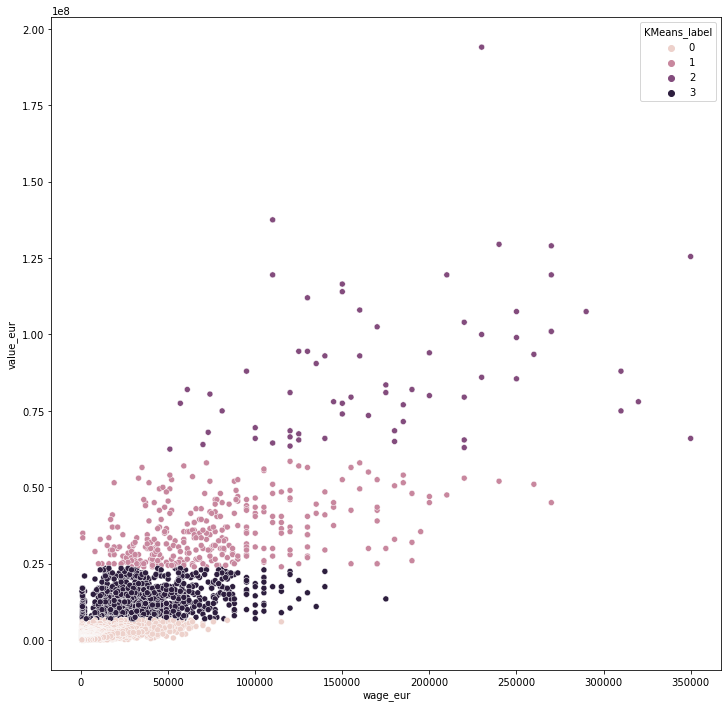

In [79]:
plt.rcParams['figure.figsize'] = (12,12)
sns.scatterplot(x=df_cl.wage_eur,y=df_cl.value_eur,hue=df_cl.KMeans_label)

In [80]:
from sklearn.cluster import DBSCAN

In [81]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster._dbscan:

class DBSCAN(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
 |  
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |  
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |  
 |  Read more in the :ref:`User Guide <dbscan>`.
 |  
 |  Parameters
 |  ----------
 |  eps : float, default=0.5
 |      The maximum distance between two samples for one to be considered
 |      as in the neighborhood of the other. This is not a maximum bound
 |      on the distances of points within a cluster. This is the most
 |      important DBSCAN parameter to choose appropriately for your data set
 |      and distance function.
 |  
 |  min_sam

In [129]:
dbcluster = DBSCAN(min_samples=2,eps=0.8)

In [130]:
dbcluster.fit(df_cl[['overall', 'potential', 'international_reputation',
       'attacking_short_passing', 'skill_long_passing',
       'movement_reactions', 'power_shot_power', 'mentality_vision',
       'mentality_composure', 'cam','value_eur','wage_eur']])

DBSCAN(eps=0.8, min_samples=2)

In [131]:
df_cl['DBSCAN_label'] = dbcluster.fit_predict(df_cl[['overall', 'potential', 'international_reputation',
       'attacking_short_passing', 'skill_long_passing',
       'movement_reactions', 'power_shot_power', 'mentality_vision',
       'mentality_composure', 'cam','value_eur','wage_eur']])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='wage_eur', ylabel='value_eur'>

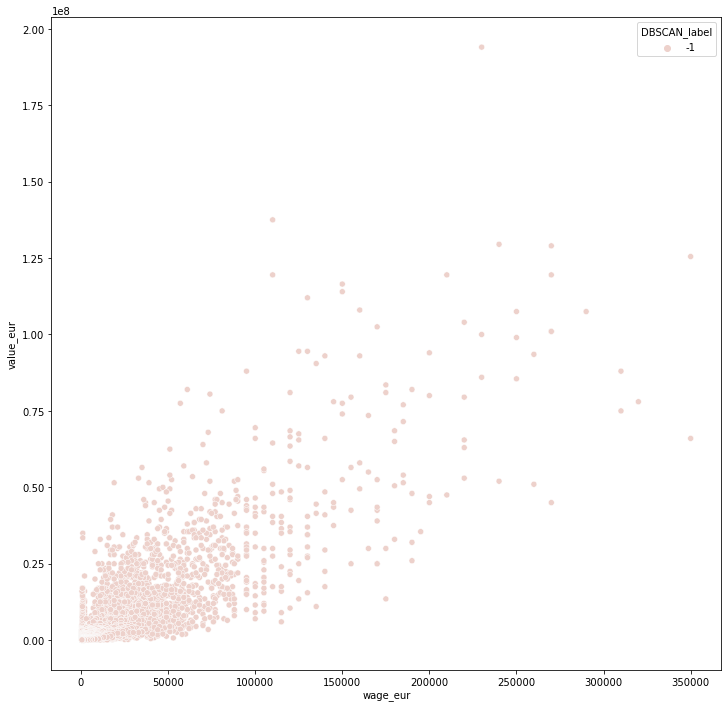

In [132]:
plt.rcParams['figure.figsize'] = (12,12)
sns.scatterplot(x=df_cl.wage_eur,y=df_cl.value_eur,hue=df_cl.DBSCAN_label)

In [133]:
from sklearn.cluster import SpectralBiclustering

In [134]:
SBcluster = SpectralBiclustering(n_clusters=4)

In [135]:
SBcluster.fit(df_cl[['overall', 'potential', 'international_reputation',
       'attacking_short_passing', 'skill_long_passing',
       'movement_reactions', 'power_shot_power', 'mentality_vision',
       'mentality_composure', 'cam','value_eur','wage_eur']])

SpectralBiclustering(n_clusters=4)

In [137]:
help(SpectralBiclustering)

Help on class SpectralBiclustering in module sklearn.cluster._bicluster:

class SpectralBiclustering(BaseSpectral)
 |  SpectralBiclustering(n_clusters=3, *, method='bistochastic', n_components=6, n_best=3, svd_method='randomized', n_svd_vecs=None, mini_batch=False, init='k-means++', n_init=10, n_jobs='deprecated', random_state=None)
 |  
 |  Spectral biclustering (Kluger, 2003).
 |  
 |  Partitions rows and columns under the assumption that the data has
 |  an underlying checkerboard structure. For instance, if there are
 |  two row partitions and three column partitions, each row will
 |  belong to three biclusters, and each column will belong to two
 |  biclusters. The outer product of the corresponding row and column
 |  label vectors gives this checkerboard structure.
 |  
 |  Read more in the :ref:`User Guide <spectral_biclustering>`.
 |  
 |  Parameters
 |  ----------
 |  n_clusters : int or tuple (n_row_clusters, n_column_clusters), default=3
 |      The number of row and column

In [140]:
df_cl['SBcluster_label'] = SBcluster.row_labels_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='wage_eur', ylabel='value_eur'>

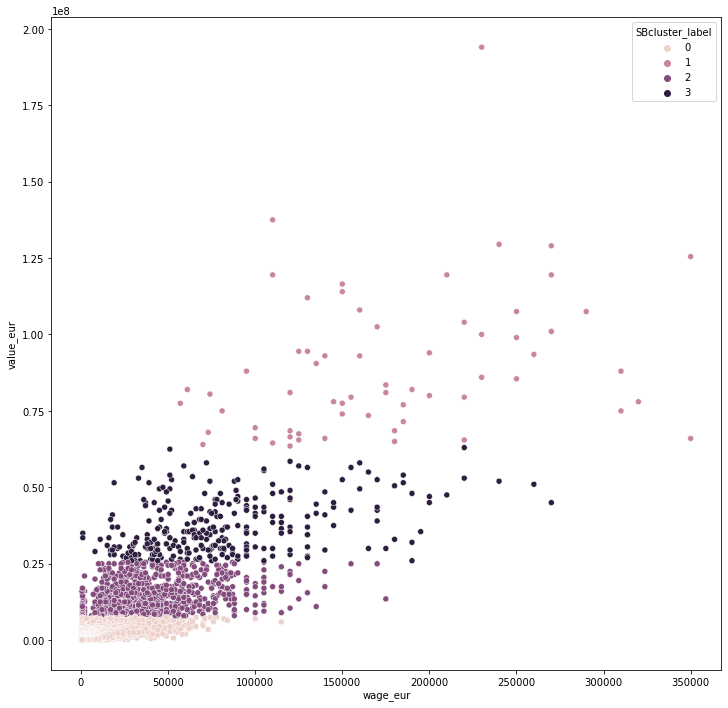

In [141]:
plt.rcParams['figure.figsize'] = (12,12)
sns.scatterplot(x=df_cl.wage_eur,y=df_cl.value_eur,hue=df_cl.SBcluster_label)